### Codio Activity 23.3: Using a Pre-trained Network

**Expected Time = 90 minutes**

**Total Points = 50**

This activity introduces the use of a pretrained network with `keras`.  There are many available models, but you will use one that can be fit with smaller image examples.  To do so, you will use the `EfficientNetV2B0` model with the `cifar10` dataset from `keras`.  

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

Run the code cell below to import the necessary libraries.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical


import warnings
warnings.filterwarnings('ignore')

#### Information on the Model and Dataset

For more information on the model you can consult the paper from its origin [here](https://arxiv.org/abs/1905.11946) and the `keras` documentation on the model [here](https://keras.io/api/applications/efficientnet/).  For your purposes, keep in mind that this model has been trained on 1000 image classes and you will use the resulting feature maps to transform the `cifar10` data.

**The Data**

This dataset contains 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. 

The categories are:

|Label	|Description|
| ------ | ------- |
|0	|airplane|
|1	|automobile|
|2	|bird|
|3	|cat|
|4	|deer|
|5	|dog|
|6	|frog|
|7	|horse|
|8	|ship|
|9	|truck|

[Back to top](#-Index)

### Problem 1

#### Dowloading the model

**10 Points**

Below, use the `EfficientNetV2B0` function with the appropriate  `input_shape` and the argument `include_top` equal to `False` to load the base model. Assign your result to the variable `base_model`.


In [6]:
### GRADED
tf.random.set_seed(42)
base_model = ''

    
### BEGIN SOLUTION
tf.random.set_seed(42)
base_model = EfficientNetV2B0(input_shape=(32, 32, 3), include_top = False)

### END SOLUTION

### ANSWER CHECK
print(base_model)

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
<Functional name=efficientnetv2-b0, built=True>


In [6]:
### BEGIN HIDDEN TESTS
tf.random.set_seed(42)
base_model_ = EfficientNetV2B0(input_shape=(32, 32, 3), include_top = False)
#
#
#
assert base_model.input_shape == base_model_.input_shape
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 2

#### Loading and Preparing the Data

**10 Points**

In the code cell below, use the function `load_data()` on `cifar10` to prepare the target variables. Assign the result to `(X_train`, `Y_train), (X_test, Y_test)`.

Next, use the function `to_categorical` with argument `Y_train` and assign the result to `Y_train`.

Finally, use the function `to_categorical` with argument `Y_test` and assign the result to `Y_test`.



In [10]:
from tensorflow.keras.datasets import cifar10

In [12]:
### GRADED
(X_train, Y_train), (X_test, Y_test) = ('', ''), ('', '')

    
### BEGIN SOLUTION
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

### END SOLUTION

### ANSWER CHECK
print(X_train.shape)
print(Y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
(50000, 32, 32, 3)
(50000, 10)


In [9]:
### BEGIN HIDDEN TESTS
(X_train_, y_train_), (X_test_, y_test_) = cifar10.load_data()
Y_train_ = to_categorical(y_train_)
Y_test_ = to_categorical(y_test_)#
#
#
np.testing.assert_array_equal(X_train, X_train_)
np.testing.assert_array_equal(Y_train, Y_train_)
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 3

#### Generating Feature Maps

**10 Points**

To use the pretrained network, use the `.predict` method with argument equal to `X_train_sample` on `base_model`. Assign the results as `features`.  


In [14]:
#for speeding up the process
X_train_sample = X_train[:10]
y_train_sample = Y_train[:10]

In [18]:
### GRADED
tf.random.set_seed(42)
features = ''

    
### BEGIN SOLUTION
tf.random.set_seed(42)
features = base_model.predict(X_train_sample)
### END SOLUTION

### ANSWER CHECK
print(features.shape)
print(features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
(10, 1, 1, 1280)
[[[[-0.06440632 -0.20547388 -0.15966012 ... -0.17328657 -0.11712743
    -0.2630096 ]]]


 [[[-0.050694   -0.18143596 -0.17283209 ... -0.06976502 -0.11457986
    -0.13624412]]]


 [[[-0.25769326 -0.23559853 -0.07821579 ... -0.0968245  -0.25693327
    -0.1991523 ]]]


 ...


 [[[-0.22167026 -0.24241693 -0.04717604 ... -0.05910296 -0.10702246
    -0.09970639]]]


 [[[-0.09291563 -0.20124449 -0.1270576  ... -0.07254502 -0.17310044
    -0.09926757]]]


 [[[-0.10212735 -0.0632991  -0.11846955 ... -0.15996766 -0.2667046
    -0.23074667]]]]


In [12]:
### BEGIN HIDDEN TESTS
tf.random.set_seed(42)
features_ = base_model_.predict(X_train_sample)
#
#
#
np.testing.assert_array_equal(features, features_)
### END HIDDEN TESTS

1/1 [==============================] - 2s 2s/step


[Back to top](#-Index)

### Problem 4

#### Making Predictions for Data

**10 Points**

Below, use the function `Sequential` to create a neural network named `top` using the following architecture:

- One `Flatten` layer to flatten the results of pooling
- One `Dense` layer with 100 nodes and `relu` activation
- One `Dense` output layer 10 noded and with `softmax` activation

Compile `top` using `categorical_crossentropy` as your loss and  `accuracy` as your metric.

Use the `fit()` function on the `top` network to fit the training data `features` and `Y_train`. Set the argument `validation_split` equal to `0.2`, the argument `epochs` equal to 5, and the argument `verbose` equal to 0.  Assign the result to the variable `history` below. 


In [22]:
### GRADED
tf.random.set_seed(42)
top = ''
history = ''
    
### BEGIN SOLUTION
tf.random.set_seed(42)
top = Sequential([Flatten(), Dense(100, activation = 'relu'),
                    Dense(10, activation = 'softmax')])

top.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = top.fit(features, Y_train, validation_split = 0.2, 
                  epochs = 5, verbose = 0)
### END SOLUTION

### ANSWER CHECK
print(history.history['accuracy'][-5:])
print(history.history['val_accuracy'][-5:])

[0.0, 0.5, 1.0, 0.875, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0]


In [14]:
### BEGIN HIDDEN TESTS
tf.random.set_seed(42)
top_ = Sequential([Flatten(), Dense(100, activation = 'relu'),
                    Dense(10, activation = 'softmax')])

top_.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

history_ = top.fit(features_, Y_train_, validation_split = 0.2, 
                  epochs = 5, verbose = 0)
#
#
#
assert len(history.history['accuracy']) == len(history_.history['accuracy'])
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 5

#### Predicting Test Data

**10 Points**

To make predictions, use the function `predict()` on `base_model` with argument `X_test[:10]`. Assign the result to `test_features`.

Next, use the function `predict()` on the `top` object with argument equal to `test_features`. Use the function NumPy  function `argmax` to retrieve the indices of the maximum elements in the array along the `axis` 1.
Assign the result to the variable `preds`.

HINT: The pseudocode for this last step is given below:

```Python
preds = np.argmax(conv_model.predict(...), axis = ...)
```

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[1 1 1 1 1 1 1 1 1 1]
[3 8 8 0 6 6 1 6 3 1]


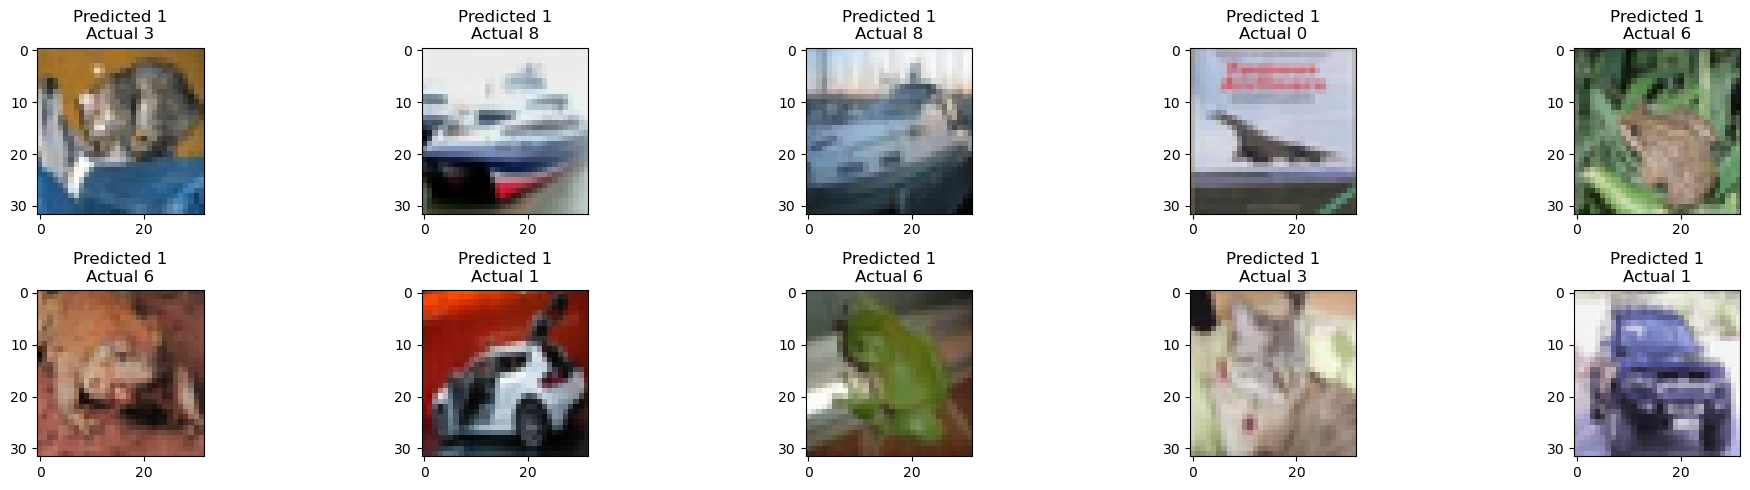

In [26]:
### GRADED
tf.random.set_seed(42)
test_exs = X_test[:10]
test_preds = ''
  
### BEGIN SOLUTION
tf.random.set_seed(42)
test_features = base_model.predict(X_test[:10])
test_preds = np.argmax(top.predict(test_features), axis = 1)

### END SOLUTION

### ANSWER CHECK
print(test_preds)
print(y_test[:10].reshape(10,))
fig, ax = plt.subplots(2, 5, figsize = (20, 5))
c = 0
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(X_test[c])
        ax[i, j].set_title(f'Predicted {test_preds[c]}\nActual {y_test[c][0]}')
        c += 1
plt.tight_layout()

In [16]:
### BEGIN HIDDEN TESTS
tf.random.set_seed(42)
test_features_ = base_model.predict(X_test_[:10])
test_preds_ = np.argmax(top_.predict(test_features_), axis = 1)
#
#
#
assert len(test_preds), len(test_preds_)
### END HIDDEN TESTS

1/1 [==============================] - 0s 89ms/step
